# IMPORTING LIBRARIES

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt

# Load Data

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

After extracting its contents, assign variables with the proper file path for the training and validation set.

In [6]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [7]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

# Understanding the data

Let's look at how many cats and dogs images are in the training and validation directory:

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


For convenience, set up variables to use while pre-processing the dataset and training the network.

# Preparing Data

*. Format the images into appropriately pre-processed floating point tensors before feeding to the network:

*. Read images from the disk.
Decode contents of these images and convert it into proper grid format as per their RGB content.
Convert them into floating point tensors.
Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.
  Fortunately, all these tasks can be done with the ImageDataGenerator class provided by tf.keras. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

After defining the generators for training and validation images, the flow_from_directory method load images from the disk, applies rescaling, and resizes the images into the required dimensions.

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=128,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(150, 150),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=128,
                                                              directory=validation_dir,
                                                              target_size=(150, 150),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


# Visualize training images

Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with matplotlib.

In [13]:
sample_training_images, _ = next(train_data_gen)

The next function returns a batch from the dataset. The return value of next function is in form of (x_train, y_train) where x_train is training features and y_train, its labels. Discard the labels to only visualize the training images.

In [14]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

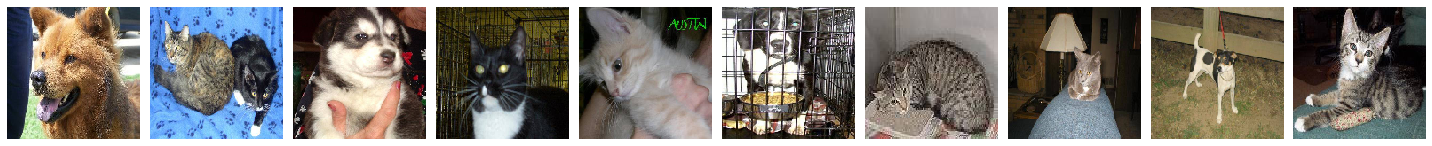

In [15]:
plotImages(sample_training_images[:10])

# Create the Convolutional Model

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it that is activated by a relu activation function.

In [16]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

# Compile the model

For this tutorial, choose the ADAM optimizer and binary cross entropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument.

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Use the fit_generator method of the ImageDataGenerator class to train the network.

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // 128,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // 128
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 76s 5s/step - loss: 1.0963 - accuracy: 0.5075 - val_loss: 0.6921 - val_accuracy: 0.4955
Epoch 2/15
15/15 [==============================] - 35s 2s/step - loss: 0.6852 - accuracy: 0.5182 - val_loss: 0.7076 - val_accuracy: 0.5781
Epoch 3/15
15/15 [==============================] - 35s 2s/step - loss: 0.6821 - accuracy: 0.5101 - val_loss: 0.6679 - val_accuracy: 0.5301
Epoch 4/15
15/15 [==============================] - 35s 2s/step - loss: 0.6424 - accuracy: 0.6052 - val_loss: 0.7309 - val_accuracy: 0.5067
Epoch 5/15
15/15 [==============================] - 36s 2s/step - loss: 0.6014 - accuracy: 0.6587 - val_loss: 0.6151 - val_accuracy: 0.6775
Epoch 6/15
15/15 [==============================] - 34s 2s/step - loss: 0.5467 - accuracy: 0.7067 - val_loss: 0.6563 - val_accuracy: 

# Visualizing Training Results

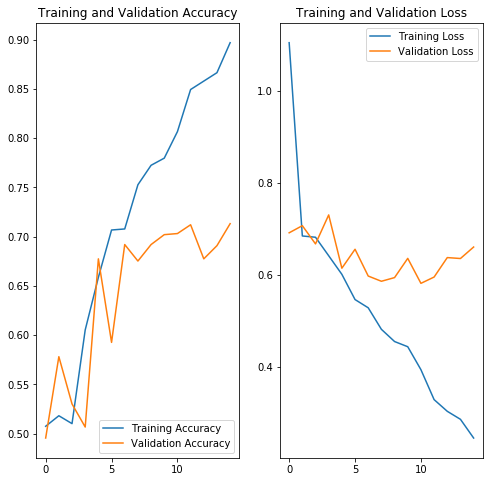

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# SAVING MODEL

In [ ]:
model.save("C:/Users/HP/Desktop/Augmentation/image classification.h5" )